Ejercicio 2: Nos quedamos solo con los aglomerados de la Cuidad de Buenos Aires y del Gran Buenos Aires. 

In [2]:
import pandas as pd
df = pd.read_excel('/Users/manuelsoaresgache/Desktop/Big data - TP3/usu_individual_T423.xlsx')

In [3]:
# Códigos de aglomerado para Ciudad Autónoma de Buenos Aires y Gran Buenos Aires
codigos_buenos_aires = [32, 33]
# Filtrar los datos
df_a = df[df['AGLOMERADO'].isin(codigos_buenos_aires)]

In [4]:
# Supongamos que 'df_a' es tu DataFrame original

# Guarda el número de filas antes de aplicar el filtro
filas_originales = len(df_a)

# Selecciona solo las columnas que no son de tipo string
numeric_columns = df_a.select_dtypes(exclude=['object']).columns

# Filtra las filas que tienen valores negativos en las columnas numéricas
df_b = df_a[~df_a[numeric_columns].apply(lambda row: (row < 0).any(), axis=1)]

# Calcula el número de filas después de aplicar el filtro
filas_nuevas = len(df_b)

# Calcula cuántas filas se eliminaron
filas_eliminadas = filas_originales - filas_nuevas

# Muestra cuántas filas se eliminaron
print("Se eliminaron {} filas.".format(filas_eliminadas))

# Ahora 'df_b' contiene solo las observaciones sin valores negativos en las columnas numéricas,
# sin eliminar las filas que contienen valores faltantes

Se eliminaron 1411 filas.


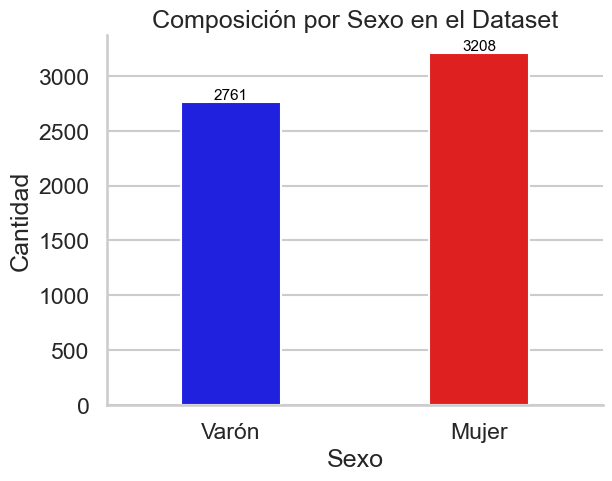

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de Seaborn
sns.set(style="whitegrid", context='talk')

# Crear un gráfico de barras para la distribución por sexo
# Especificar colores personalizados para cada sexo y ajustar el ancho de las barras
ax = sns.countplot(x='CH04', data=df_b, palette=['blue', 'red'], width=0.4)

# Establecer etiquetas y título
ax.set_xticklabels(['Varón', 'Mujer'])
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad')
ax.set_title('Composición por Sexo en el Dataset')

# Añadir anotaciones con la cantidad exacta sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ajustes adicionales para mejorar la estética
plt.xticks(rotation=0)  # Asegurar que las etiquetas del eje x están correctamente alineadas
sns.despine()  # Quitar los bordes para un look más limpio

# Mostrar el gráfico
plt.show()


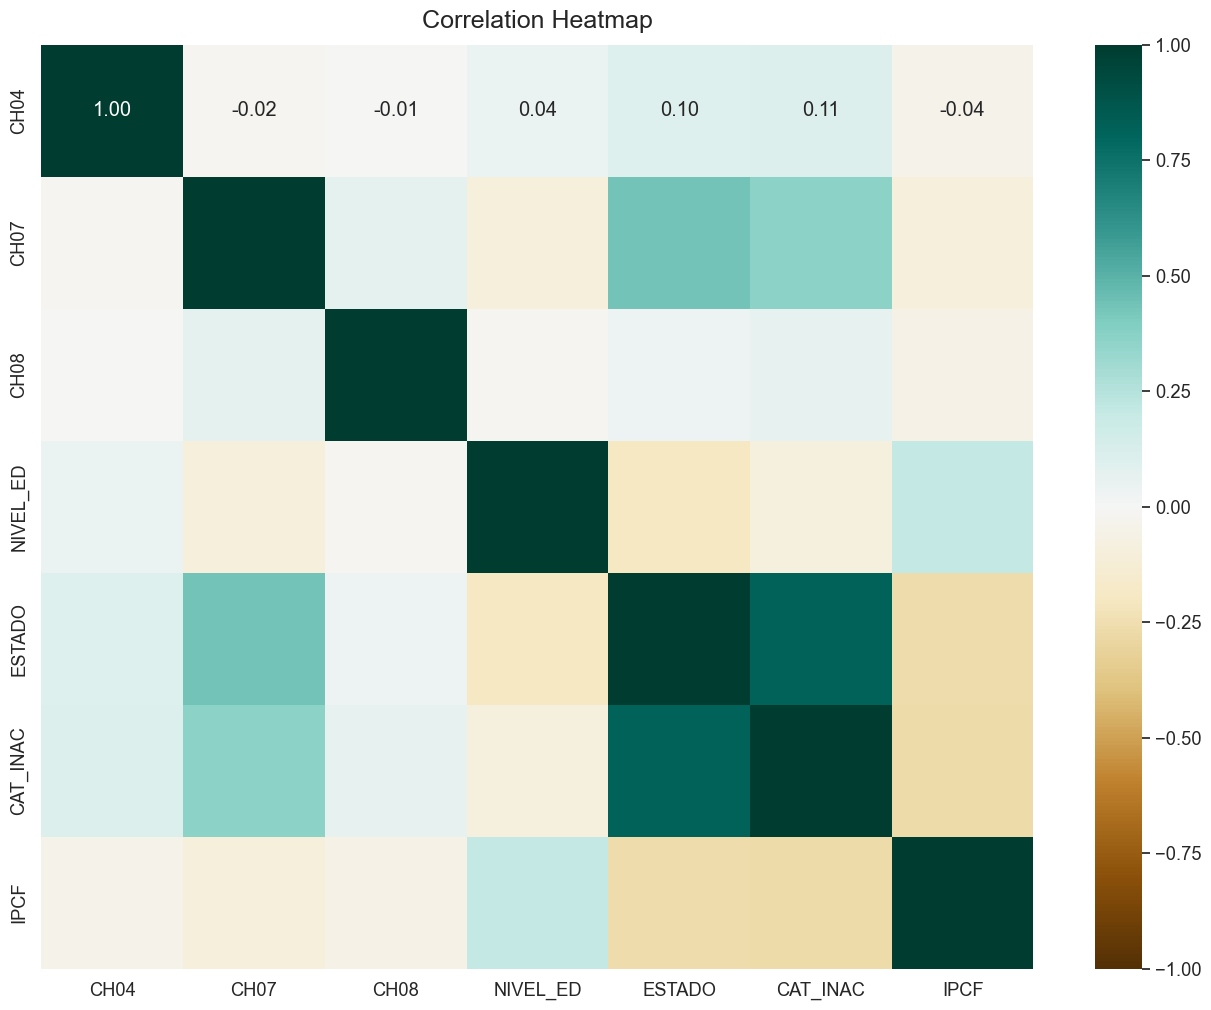

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables relevantes
selected_variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Seleccionar solo las columnas necesarias del DataFrame limpio
selected_data = df_b[selected_variables]

# Calcular la matriz de correlación
correlation_matrix = selected_data.corr()

# Ajustar el tamaño del mapa de calor y la fuente de la anotación
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.2)

# Crear el mapa de calor de la matriz de correlación
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG', xticklabels=True, yticklabels=True)

# Añadir un título al mapa de calor
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# Guardar el mapa de calor como un archivo PNG
plt.savefig('heatmap1.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Calcular la cantidad de desocupados
desocupados = df_b[df_b['ESTADO'] == 2].shape[0]

# Calcular la cantidad de inactivos
inactivos = df_b[df_b['ESTADO'] == 3].shape[0]

# Calcular la media de IPCF según el estado ocupacional
media_ipcf_por_estado = df_b.groupby('ESTADO')['IPCF'].mean()

# Imprimir los resultados
print("Cantidad de desocupados:", desocupados)
print("Cantidad de inactivos:", inactivos)
print("\nMedia de IPCF según estado ocupacional:")
print(media_ipcf_por_estado)


Cantidad de desocupados: 226
Cantidad de inactivos: 2507

Media de IPCF según estado ocupacional:
ESTADO
0         0.000000
1    190809.678283
2     61605.874425
3     93740.533139
4     75891.491137
Name: IPCF, dtype: float64


In [16]:
import pandas as pd

# Mostrar las primeras filas para verificar la estructura de las columnas CH06 y CH04
print(df_b[['CH06', 'CH04']].head())

     CH06  CH04
109    76     1
110    79     2
111    65     1
112    66     2
113    49     2


In [24]:
# Crear un diccionario para la tabla de equivalencia por sexo y edad
adulto_equiv = {
    'edad_min': [0, 10, 18, 30, 46, 61, 76],
    'edad_max': [9, 17, 29, 45, 60, 75, 120],  # Uso 120 para cubrir todos hasta "más de 75 años"
    'Mujeres': [0.69, 0.77, 0.76, 0.77, 0.76, 0.67, 0.63],
    'Varones': [0.69, 1.04, 1.02, 1.00, 1.00, 0.83, 0.74]
}
tabla_equiv = pd.DataFrame(adulto_equiv)

# Función para buscar el equivalente de adulto basado en edad y sexo
def get_adulto_equiv(edad, sexo):
    # Filtrar por rango de edad
    row = tabla_equiv[(tabla_equiv['edad_min'] <= edad) & (tabla_equiv['edad_max'] >= edad)]
    if sexo == 1:  # Hombre
        return row['Varones'].values[0]
    else:  # Mujer
        return row['Mujeres'].values[0]

# Aplicar la función para crear la columna 'adulto_equiv'
df_b['adulto_equiv'] = df_b.apply(lambda row: get_adulto_equiv(row['CH06'], row['CH04']), axis=1)

# Sumar la columna 'adulto_equiv' para las personas que pertenecen al mismo hogar
# Asumiendo que hay una columna 'Hogar' que identifica cada hogar
df_b['ad_equiv_hogar'] = df_b.groupby('CODUSU')['adulto_equiv'].transform('sum')

# Mostrar el resultado
print(df_b[['CH06', 'CH04', 'adulto_equiv', 'ad_equiv_hogar']].head())


     CH06  CH04  adulto_equiv  ad_equiv_hogar
109    76     1          0.74            1.37
110    79     2          0.63            1.37
111    65     1          0.83            5.71
112    66     2          0.67            5.71
113    49     2          0.76            2.82


/var/folders/6w/8tcgqntn20ggvsnbmjxnd3_m0000gn/T/ipykernel_31545/2402944136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['adulto_equiv'] = df_b.apply(lambda row: get_adulto_equiv(row['CH06'], row['CH04']), axis=1)
/var/folders/6w/8tcgqntn20ggvsnbmjxnd3_m0000gn/T/ipykernel_31545/2402944136.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['ad_equiv_hogar'] = df_b.groupby('CODUSU')['adulto_equiv'].transform('sum')


In [27]:
# Contar la cantidad de ceros en la columna 'ITF'
cantidad_de_ceros_ITF = (df_b['ITF'] == 0).sum()

# Imprimir la cantidad de ceros
print("Cantidad de ceros en la variable 'ITF':", cantidad_de_ceros_ITF)

Cantidad de ceros en la variable 'ITF': 1618


In [28]:
# Crear una base de datos con las observaciones donde se respondió la pregunta sobre ITF
respondieron = df_b[df_b['ITF'] != 0]

# Crear una base de datos con las observaciones donde no se respondió la pregunta sobre ITF
norespondieron = df_b[df_b['ITF'] == 0]




In [30]:
# Definir el valor de la Canasta Básica Total para un adulto equivalente
CBT_adulto_equiv = 132853.3

# Calcular el ingreso necesario
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * CBT_adulto_equiv

# Mostrar las primeras filas para verificar
print(respondieron[['NRO_HOGAR', 'ad_equiv_hogar', 'ingreso_necesario']].head())

# Mostrar un mensaje de confirmación
print("El ingreso necesario ha sido calculado y guardado en 'respondieron_con_ingreso_necesario.xlsx' correctamente.")


     NRO_HOGAR  ad_equiv_hogar  ingreso_necesario
109          1            1.37         182009.021
110          1            1.37         182009.021
113          1            2.82         374646.306
114          1            2.82         374646.306
115          1            2.82         374646.306
El ingreso necesario ha sido calculado y guardado en 'respondieron_con_ingreso_necesario.xlsx' correctamente.


/var/folders/6w/8tcgqntn20ggvsnbmjxnd3_m0000gn/T/ipykernel_31545/1892953054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * CBT_adulto_equiv


In [31]:
# Agregar la columna 'pobre' a la base 'respondieron'
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

# Contar cuántos pobres hay
cantidad_pobres = respondieron['pobre'].sum()

# Imprimir la cantidad de pobres identificados
print("Cantidad de pobres identificados:", cantidad_pobres)


# Mostrar un mensaje de confirmación
print("La información sobre la pobreza ha sido calculada y guardada en 'respondieron_final.xlsx' correctamente.")


Cantidad de pobres identificados: 1789
La información sobre la pobreza ha sido calculada y guardada en 'respondieron_final.xlsx' correctamente.


/var/folders/6w/8tcgqntn20ggvsnbmjxnd3_m0000gn/T/ipykernel_31545/3978622759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)
